# Project: Noshowappointment data analysis

## Research Questions

1. How many people did not show up for the appointment?

2. Which age groups are more likely to show up after receiving a sms?

3. What is the mean age of those who showed up at different towns?

4. What are the effects of alcoholism on each gender attendance?

5. Does receiving an sms actually improved number of those show up?

6. How were different dates of scheduledday distributed among ages?

# Table of contents

Introduction

Data wrangling

Data cleaning

Exploratory Data Analysis

Conclusions

# Introduction

This dataset is from medical appointments in Brazil. It mainly focuses on whether the patients showed up for the appointments or not. It has over 100k records of scheduled appointments.

In [122]:
# import statements for all of the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
#read the csv file
noshowapp=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [124]:
#general overview
noshowapp.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data wrangling

Discover the shape of the dataset

In [125]:
#find out number of columns in our dataset
noshowapp.shape

(110527, 14)

Description of the dataframe

In [126]:
#general description of how our dataframe looks like
noshowapp.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Datatypes found in the dataset

In [127]:
#know the datatypes
noshowapp.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Specific datatype for the gender column

In [128]:
#datatype for the gender column
type(noshowapp.Gender)

pandas.core.series.Series

Specific datatype for the No-show column

In [129]:
#datatype for no_show column
type(noshowapp['No-show'])

pandas.core.series.Series

Number of null values 

In [130]:
#find out number of null values
noshowapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Number of unique values

In [131]:
#number of unique values in our dataset
noshowapp.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [132]:
noshowapp.tail(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


Count of duplicated rows.

In [133]:
#find out number of duplicates
noshowapp.duplicated().sum()


0

In [134]:
#number of null values per column
noshowapp.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Data cleaning

Dropped the PatientID and AppointmentID columns since they would not be useful in our analysis.

In [135]:
#first start by cleaning columns
#remove columns which are not useful in our analysis such as the PatientID and appointmentID columns
noshowapp.head(1)
noshowapp.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [136]:
#confirm the changes made 
noshowapp.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


convert all columns to lower characters to make the easier to work with

In [137]:
#convert all columns to lower characters to make the easier to work with
#a function to rename all columns in your dataset
def renamecol(name):
    name=name.rename(columns=lambda y:y.strip().lower(),inplace=True)
    return name;
renamecol(noshowapp)

Renamed all columns to lowercase and the 'no-show ' column to 'no_show ' so as to reduce error and create consistent columns.

In [138]:
#remove hyphen in last column and rename it to make it more accessible
noshowapp.rename({'no-show':'no_show'},axis=1,inplace=True)

In [139]:
#confirm the changes
noshowapp.no_show

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: no_show, Length: 110527, dtype: object

In [140]:
#confirm changes to our columns
noshowapp.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Dropped all duplicates.

In [141]:
#find number of duplicates
noshowapp.duplicated().sum()

635

In [142]:
#drop duplicate columns
noshowapp=noshowapp.drop_duplicates()

In [143]:
noshowapp.duplicated().sum()

0

In [144]:
noshowapp.isnull().sum()

gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

In [145]:
#save the current changes to prevent entire loss in case of a mistake
noshowapp.to_csv('noshowappointments.csv',index=0)
noshowapp

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [146]:
noshowapp.dtypes

gender            object
scheduledday      object
appointmentday    object
age                int64
neighbourhood     object
scholarship        int64
hipertension       int64
diabetes           int64
alcoholism         int64
handcap            int64
sms_received       int64
no_show           object
dtype: object

In [147]:
#Further investigation into data types
type(noshowapp.gender)

pandas.core.series.Series

In [148]:
type(noshowapp.scheduledday)

pandas.core.series.Series

In [149]:
noshowapp.to_csv('noshowappointments_v1.csv',index=False)
noshowapp

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


Convert the 'scheduledday ' and 'appointedday ' columns into datatime data types.

In [150]:
#convert scheduledday and appointmentday to datetime datatypes
#remove 'T' in the scheduledday and appointmentday column
time=['scheduledday','appointmentday']
for c in time:
    day=noshowapp[c].apply(lambda x:x.split('T')[0])
    tim=noshowapp[c].apply(lambda x:x.split('T')[1])
    noshowapp[c]=day+tim
noshowapp.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-2918:38:08Z,2016-04-2900:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [151]:
#remove 'Z' in the scheduledday and appointmentday column
time=['scheduledday','appointmentday']
for c in time:
    day=noshowapp[c].apply(lambda x:x.split('Z')[0])
    noshowapp[c]=day
noshowapp.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-2918:38:08,2016-04-2900:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [152]:
#convert scheduledday into datetime data types
noshowapp['scheduledday']=pd.to_datetime(noshowapp['scheduledday'],format='%Y-%m-%d%H:%M:%S')

In [153]:
#convert appointmentday into datetime data types
noshowapp['appointmentday']=pd.to_datetime(noshowapp['appointmentday'],format='%Y-%m-%d%H:%M:%S')

In [154]:
#confirm changes made to datatypes
noshowapp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109892 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          109892 non-null  object        
 1   scheduledday    109892 non-null  datetime64[ns]
 2   appointmentday  109892 non-null  datetime64[ns]
 3   age             109892 non-null  int64         
 4   neighbourhood   109892 non-null  object        
 5   scholarship     109892 non-null  int64         
 6   hipertension    109892 non-null  int64         
 7   diabetes        109892 non-null  int64         
 8   alcoholism      109892 non-null  int64         
 9   handcap         109892 non-null  int64         
 10  sms_received    109892 non-null  int64         
 11  no_show         109892 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.9+ MB


### Summary of Data Cleaning

Dropped all duplicates.

Dropped the PatientID and AppointmentID columns since they would not be useful in our analysis.

Renamed all columns to lowercase and the 'no-show ' column to 'no_show ' so as to reduce error and create consistent columns.

Converted the 'scheduledday ' and 'appointedday ' columns into datatime data types.

Note: The table had no null values.

## Exploratory data analysis

Q1: Number of people who did not show up

In [155]:
#number of those who did not show up
noshowapp.query('no_show=="Yes"').count()

gender            22098
scheduledday      22098
appointmentday    22098
age               22098
neighbourhood     22098
scholarship       22098
hipertension      22098
diabetes          22098
alcoholism        22098
handcap           22098
sms_received      22098
no_show           22098
dtype: int64

We can draw a pie chart so as to get a general overview of the number of those who showed up.

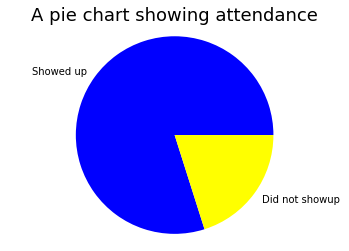

In [156]:
#First get the count of those who showed and did not show up
noshow=noshowapp.query('no_show=="Yes"')['scheduledday'].count()
show=noshowapp.query('no_show=="No"')['scheduledday'].count()
#plot the pie graph
plt.pie([show,noshow],labels=['Showed up','Did not showup'],colors=['blue','yellow'])
plt.title('A pie chart showing attendance',fontsize=18)
plt.axis('equal')
plt.show()

The pie chart gives us a general view of those who showed up. From there we can us further questions such as: 

Which gender showed up more?

Turn out per town

If receiving an sms affects attendance.

Q2: Which age groups are more likely to show up after receiving a sms?

Text(0, 0.5, 'Frequency of attendance')

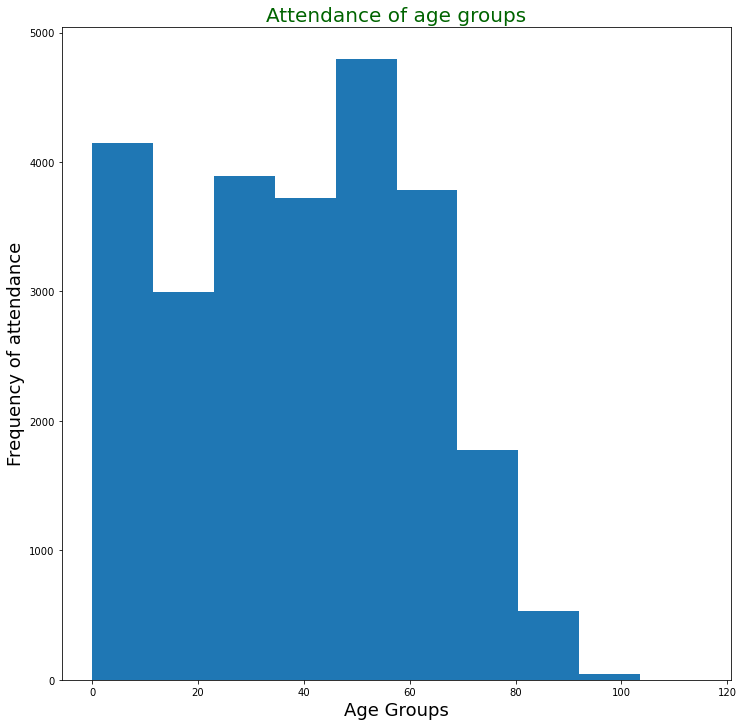

In [157]:
#Investigating which age groups are more likely to show up after receiving the sms
noshowapp.query('no_show=="No"&sms_received>=1').age.plot(kind='hist',figsize=(12,12))
plt.title('Attendance of age groups',fontsize=20,color='darkgreen')
#Label the x and y axis
plt.xlabel('Age Groups',fontsize=18)
plt.ylabel('Frequency of attendance',fontsize=18)

It seems that those between 50-60 yrs were more likely to attend after receiving an sms assuming that sms was sent evenly across all age groups. We can dive further and investigate the nighbourhood of those who showed up in the next question.

Q3: What is the mean age of those who showed up at different towns?

Text(0, 0.5, 'Mean Age')

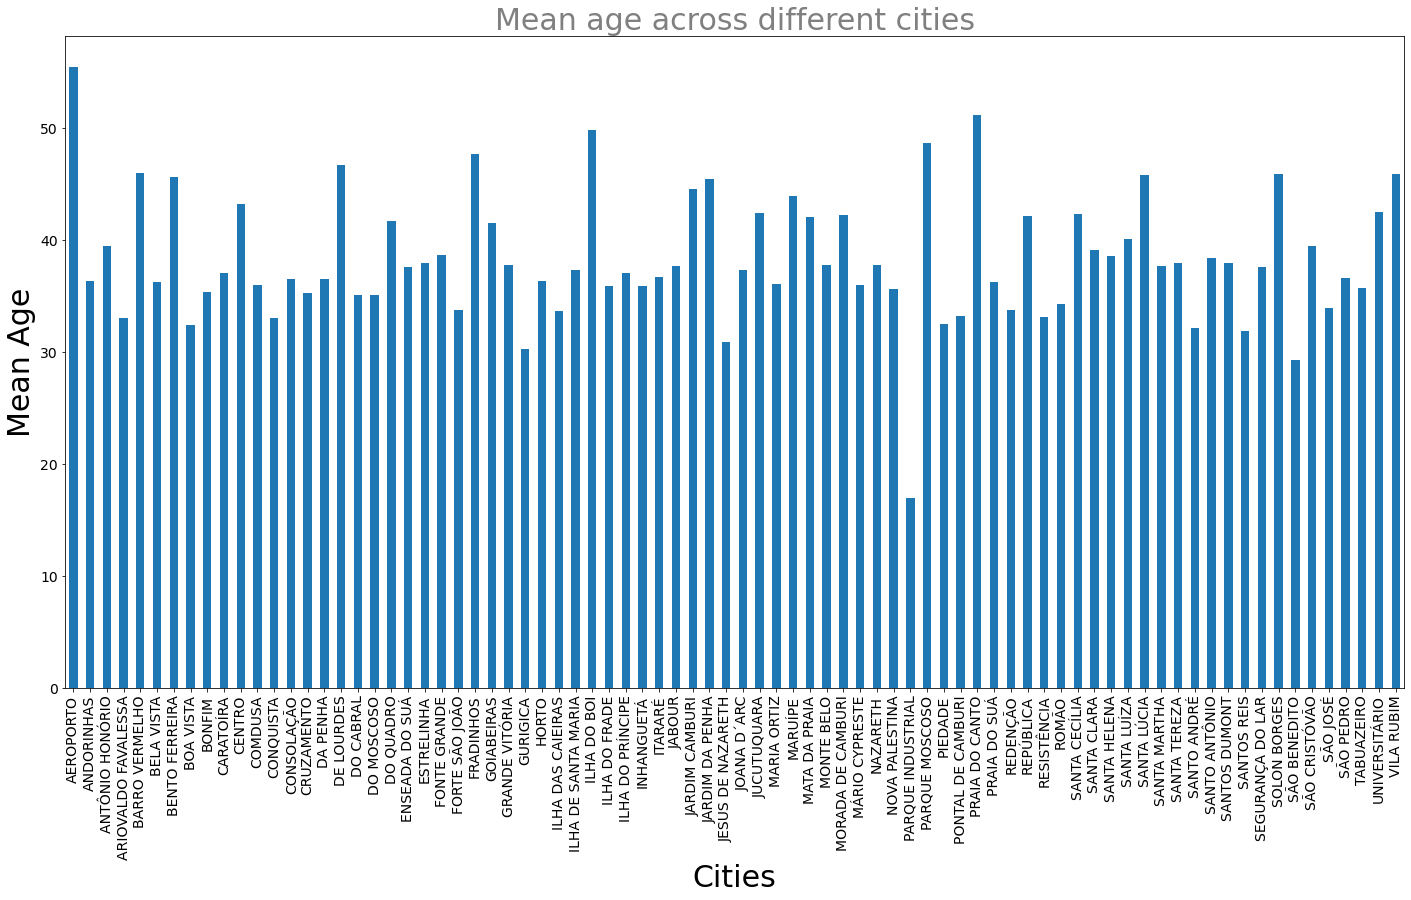

In [158]:
#Mean age of those who showed up across different towns
#Query those who showed up
y=noshowapp.query('no_show=="No"')
#Group by nighbourhoods
z=y.groupby('neighbourhood')['age'].mean()
#Plot a bar graph
z.plot(kind='bar',figsize=(24,12),fontsize=14)
plt.title('Mean age across different cities',fontsize=30,color='grey')
plt.xlabel('Cities',fontsize=30)
plt.ylabel('Mean Age',fontsize=30)

From the graph it can be concluded that Aeroporto had the highest mean age while Parque Industrial had the lowest mean age.

Q4: What are the effects of alcoholism on each gender attendance?

In [159]:
#Investigate which gender is most affected by alcoholism
#Query those who did not show up and were alcoholics and are males
showalc_M=noshowapp.query('no_show=="Yes"&alcoholism==1&gender=="M"')
#Count
showalc_M=showalc_M.scheduledday.count()
#divide with the total to get a ratio,this is because females are more in our dataset
showalc_M=showalc_M/noshowapp.query('gender=="M"')['scheduledday'].count()
showalc_M

0.009486679662118259

In [160]:
#Query those who did not show up and were alcoholics and are females
showalc_F=noshowapp.query('no_show=="Yes"&alcoholism==1&gender=="F"')
#Count
showalc_F=showalc_F.scheduledday.count()
#divide with the total to get a ratio
showalc_F=showalc_F/noshowapp.query('gender=="F"')['scheduledday'].count()
showalc_F

0.004242687315345086

Text(0, 0.5, 'Number of alcoholics')

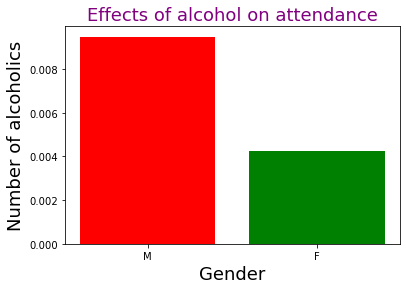

In [161]:
#plot a bar to compare the ratio
plt.bar(['M','F'],[showalc_M,showalc_F],color=['red','green'])
plt.title('Effects of alcohol on attendance',fontsize=18,color='Purple')
plt.xlabel('Gender',fontsize=18)
plt.ylabel('Number of alcoholics',fontsize=18)

From the graph it can be concluded that the effect of alcoholism is twice as much on males compared to females.

Q5: Does receiving an sms actually improved number of those who show up?

In [162]:
#effect of sms on showing up
#Find number of those who received an sms and showed up 
sms=noshowapp.query('sms_received>=1&no_show=="No"')['appointmentday'].count()
#Find number of those who received an  no sms and showed up 
nosms=noshowapp.query('sms_received==0&no_show=="No"')['appointmentday'].count()

In [163]:
#Divide by totals since number of people who never received messages is higher
#Find the ratio of those who received an sms and showed up
total_sms=noshowapp.query('sms_received>=1')['appointmentday'].count()
sms=sms/total_sms
#Find the ratio of those who did not received an sms and showed up
total_nosms=noshowapp.query('sms_received==0')['appointmentday'].count()
nosms=nosms/total_nosms

Text(0, 0.5, 'Count')

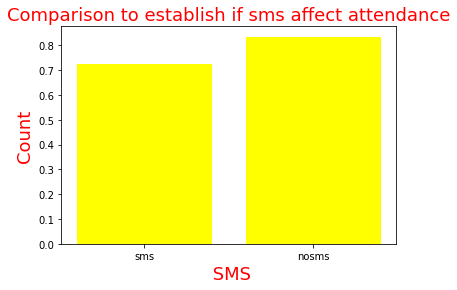

In [164]:
#plot  bar graph to compare
plt.bar([1,2],[sms,nosms],color='Yellow',tick_label=['sms','nosms'])
plt.title('Comparison to establish if sms affect attendance',fontsize=18,color='red')
plt.xlabel(' SMS',fontsize=18,color='red')
plt.ylabel('Count',fontsize=18,color='red')

From the graph, it can be deduced that graphs have little effect on attendance.

Q6: How were different dates of scheduledday distributed among ages?

Text(0, 0.5, 'Ages')

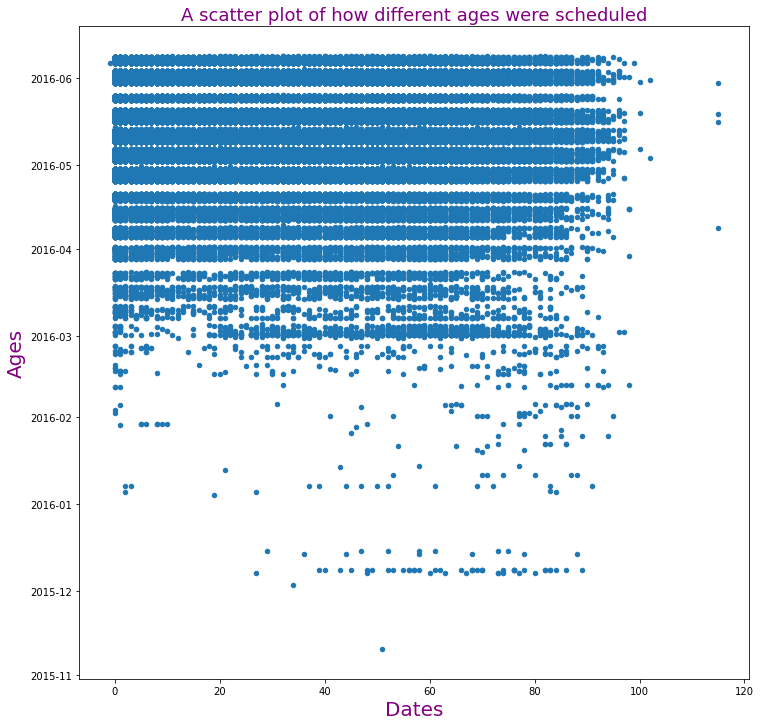

In [165]:
noshowapp.plot(kind='scatter',y='scheduledday',x='age',figsize=(12,12))
plt.title('A scatter plot of how different ages were scheduled',fontsize=18,color='purple')
plt.xlabel('Dates',fontsize=20,color='purple')
plt.ylabel('Ages',fontsize=20,color='purple')

During earlier dates,few people were scheduled for an appointment and most people who had an appointment during the earlier days were mostly above 25 years of age.

## Conclusions

From the charts above, the following conclusions were observed:
1. More people actually show up for the appointment.

2. Attendance between age groups had a variations. Older age groups were less likely to show up for the appointment.

3. The mean age across different neighbourhoods was quite varied. 

4. Males were more than twice as likely to be affected by alcoholism compared to females.

5. Sending an sms was less likely to affect the possibility of a person changing his/her ind on whether to attend the appointment. 

6. Scheduled dates were mostly scheduled during the last days and not evenly distributed.
 
 More research can be made into other factors such as weather, traffic and cost which can affect attendance but were not captured in the dataset.

### Limitations

Some of the rows in the dataset were duplicated. In addition to this, the no_show column had 'Yes' and 'No' values instead of 1 and 0 like the rest of the columns which had only 2 values. There was also a limitation in the factors which affected attendance.

In [167]:
noshowapp.to_csv('noshowappointments_v2.csv')